In [1]:
! python -m pip install numpy matplotlib pandas scipy seaborn scikit-learn tensorflow keras_tuner

  Using cached matplotlib-3.10.8-cp313-cp313-win_amd64.whl.metadata (52 kB)
  Using cached pandas-2.3.3-cp313-cp313-win_amd64.whl.metadata (19 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached scikit_learn-1.8.0-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached tensorflow-2.20.0-cp313-cp313-win_amd64.whl.metadata (4.6 kB)
  Using cached keras_tuner-1.4.8-py3-none-any.whl.metadata (5.6 kB)
  Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.61.1-cp313-cp313-win_amd64.whl.metadata (116 kB)
  Using cached kiwisolver-1.4.9-cp313-cp313-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-12.1.0-cp313-cp313-win_amd64.whl.metadata (9.0 kB)
  Using cached pyparsing-3.3.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached joblib-1.5.3-py3-none-any.whl.metadata (5.5 kB)
  Using 


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
! python -m pip install streamlit

  Using cached click-8.3.1-py3-none-any.whl.metadata (2.6 kB)
  Using cached tenacity-9.1.2-py3-none-any.whl.metadata (1.2 kB)
  Using cached watchdog-6.0.0-py3-none-win_amd64.whl.metadata (44 kB)
   ---------------------------------------- 0.0/9.1 MB ? eta -:--:--
   -------- ------------------------------- 1.8/9.1 MB 10.3 MB/s eta 0:00:01
   ---------------- ----------------------- 3.7/9.1 MB 10.0 MB/s eta 0:00:01
   -------------------------- ------------- 6.0/9.1 MB 10.4 MB/s eta 0:00:01
   ------------------------------------- -- 8.7/9.1 MB 10.8 MB/s eta 0:00:01
   ---------------------------------------- 9.1/9.1 MB 10.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/795.4 kB ? eta -:--:--
   --------------------------------------- 795.4/795.4 kB 10.7 MB/s eta 0:00:00
Using cached click-8.3.1-py3-none-any.whl (108 kB)
   ---------------------------------------- 0.0/28.0 MB ? eta -:--:--
   ---- ----------------------------------- 2.9/28.0 MB 13.2 MB/s eta 0:00:02


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.pyplot as mpl

from tensorflow import keras 
from keras.layers import Dense, Flatten, Input
from keras.models import Sequential
from keras.optimizers import Adam
from keras_tuner import RandomSearch
from keras.layers import Dropout

c:\Users\genc-\Downloads\Desktop\Skola\11-ai-teori-och-tillämpning-del-2\kunskapskontroll_del1\.venv\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


10. I denna uppgift ska vi använda MNIST-datan som vi arbetat med tidigare. Detta för att ha ett bekant dataset att arbeta med och experimentera med ANN-modeller. 

Hämtar MNIST-datan och delar upp det i tränings och testdata.

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

a) Träna en ANN-modell på MNIST-datan. Vad får du för resultat? 

Normaliserar pixlarna genom att divivdera x_train och x_test med 255.

In [3]:
X_train = x_train / 255.0
X_test = x_test / 255.0

Printar ut formen på all data.

In [4]:
print("x_train: ", x_train.shape)
print("x_test: ", x_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

x_train:  (60000, 28, 28)
x_test:  (10000, 28, 28)
y_train:  (60000,)
y_test:  (10000,)


En visualisering på en siffra på MNIST.

Label: 5


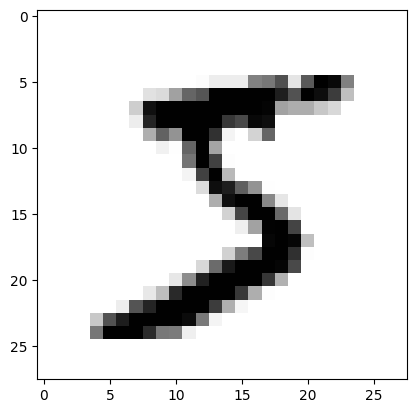

In [5]:
plt.imshow(x_train[0], cmap=mpl.cm.binary)
print("Label:", y_train[0])

Bygger neuralt nätverk som plattar ut 28×28-bilder, har lagt till två dolda lager och klassficerar de i 10 klasser.

In [6]:
model1 = Sequential()
model1.add(Input(shape=(28, 28)))
model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(10, activation='softmax'))

Kompilerar modellen så den är redo för att tränas.

In [7]:
model1.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

Tränar modellen.

In [8]:
history = model1.fit(X_train, y_train, validation_split = 0.2, epochs = 10)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9215 - loss: 0.2656 - val_accuracy: 0.9526 - val_loss: 0.1579
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9671 - loss: 0.1106 - val_accuracy: 0.9674 - val_loss: 0.1117
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9764 - loss: 0.0758 - val_accuracy: 0.9700 - val_loss: 0.1034
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9816 - loss: 0.0597 - val_accuracy: 0.9701 - val_loss: 0.0983
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9855 - loss: 0.0463 - val_accuracy: 0.9751 - val_loss: 0.0928
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9879 - loss: 0.0362 - val_accuracy: 0.9736 - val_loss: 0.0982
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9897 - loss: 0.0304 - val_accuracy: 0.9748 - val_loss: 0.0975
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9921 - loss: 0.0250 - 

Ett diagram som visar oss hur accuracy och loss ändras efter varje epoch både för tränings och testdata. Bra resultat då accuracy ligger högt upp och loss ligger lågt.

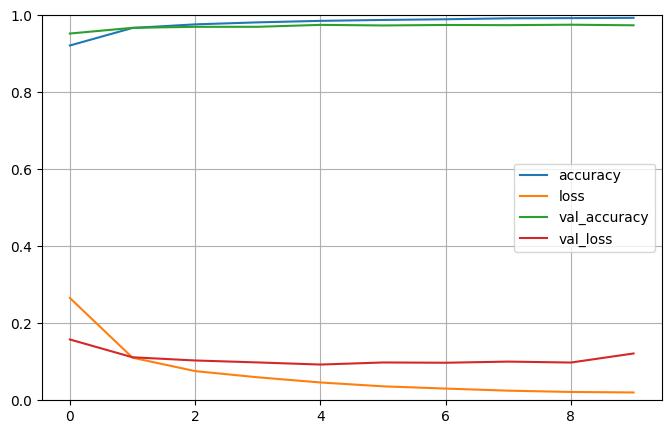

In [9]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Evaluerar modellen

In [10]:
model1.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9725 - loss: 0.1142


[0.11416395008563995, 0.9725000262260437]

Enligt evalueringen är modellen mycket bra vilket innebär att den har lärt sig mönstren bra och kommer att göra få misstag. Tränings och valideringsdatan har liknande resultat vilket innebär att den är inte överanpassad.

b) Prova justera hyperparametrarna med *KerasTuner*. Notera, du har som vanligt dokumentationen till din hjälp. Får du bättre resultat? 

En keras modell byggs med samma struktur som tidigare.

In [11]:
def build_model(hp):
    model2 = Sequential()

    model2.add(Input(shape=(28,28)))
    model2.add(Flatten())

    model2.add(Dense(
        units=hp.Int('units_1',min_value=64, max_value=256, step=64), activation='relu'
    ))
    
    model2.add(Dense(
        units=hp.Int('units_2', min_value=32, max_value=128, step=32), activation='relu'
    ))
    model2.add(Dense(10, activation='softmax'))

    model2.compile(optimizer=Adam(
        hp.Choice('learning_rate',  [1e-2, 1e-3, 1e-4])
    ),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )
    
    return model2

En tuner som söker efter de bästa hyperparametrarna för modellen med RandomSearch.

In [12]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory=r"C:\keras_tuner",
    project_name="mnist_randomsearch",
)

In [13]:
tuner.search(
    X_train,
    y_train,
    epochs = 5,
    validation_split=0.1
)

Trial 10 Complete [00h 00m 27s]
val_accuracy: 0.9683333039283752

Best val_accuracy So Far: 0.9806666374206543
Total elapsed time: 00h 04m 45s


Tuner söker efter olika hyperparametrarna för att hitta den bästa modellen.

Hämtar den bästa modellen.

In [14]:
best_model = tuner.get_best_models(num_models=1)[0]

c:\Users\genc-\Downloads\Desktop\Skola\11-ai-teori-och-tillämpning-del-2\kunskapskontroll_del1\.venv\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [15]:
history = best_model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9875 - loss: 0.0371 - val_accuracy: 0.9816 - val_loss: 0.0615
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9909 - loss: 0.0281 - val_accuracy: 0.9828 - val_loss: 0.0584
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9926 - loss: 0.0227 - val_accuracy: 0.9806 - val_loss: 0.0736
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9930 - loss: 0.0207 - val_accuracy: 0.9815 - val_loss: 0.0741
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9941 - loss: 0.0180 - val_accuracy: 0.9795 - val_loss: 0.0844
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9947 - loss: 0.0161 - val_accuracy: 0.9809 - val_loss: 0.0801
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9941 - loss: 0.0169 - val_accuracy: 0.9827 - val_loss: 0.0781
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9954 - loss: 0.0129 - 

Den här modellen utvärderar den bästa modellen på testdata.

In [16]:
test_loss, test_acc = best_model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9757 - loss: 0.1130


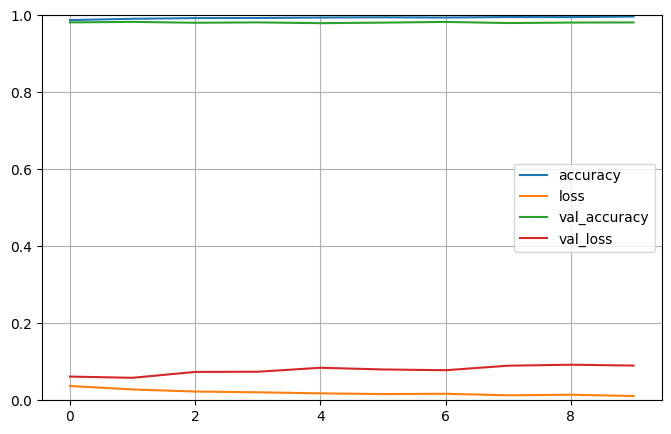

In [17]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Med kerastuner ändras in resultat så mycket. När modellen tränas vanligt är det redan ett väldigt evaluerings resultat och därför skiljer inte med eller utan kerastuner.